In [1]:
import json
import csv
import re
import sys
import pandas as pd
import numpy as np
import heapq
import gensim
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns
import string

# Functions
def csv_loader(PATH):
    text = pd.read_csv(PATH, names=['review','sentiment']) 
    return text

FILE_1 = 'music_dev'  # name of interim csv file. For example: # games_train
FILE_2 = 'games_val'  # name of comparison interim csv file. For example: # sew_train
FILE_NAME = 'games'
N_DIS = 100   # number of dissimilar embeddings to select
# python3 cosine.py 'music_dev' 'sew_val' 'sew' 2

In [70]:
# Load Interim CSV file and split into X and y
data_1 = csv_loader('../data/interim/' + FILE_1 + '.csv')
X_1, y_1 = data_1[['review']], data_1[['sentiment']]
X_1 = X_1[0:1000]

# Load Interim CSV file and split into X and y
data_2 = csv_loader('../data/interim/' + FILE_2 + '.csv')
X_2, y_2 = data_2[['review']], data_2[['sentiment']]
X_2 = X_2[0:1000]
len(X_1), len(X_2)

(1000, 1000)

In [71]:
stop_words = list(stopwords.words('english'))+list(string.punctuation)
#punct = list(string.punctuation)

# Tokenize each review and lowercase everything
corp_1 = []
for i in range(len(X_1)): 
    row = X_1.iloc[i]['review']
    token_review = word_tokenize(row)
    filtered = [corp_1.append(w.lower()) for w in token_review if not w.lower() in stop_words]
all_words = list(set(corp_1))

len(all_words)

6629

In [72]:
corp_2 = []
for i in range(1,len(X_2)): 
    row = X_2.iloc[i]['review']
    token_review = word_tokenize(row)
    filtered = [corp_2.append(w.lower()) for w in token_review if not w.lower() in stop_words]

all_words = all_words + corp_2
all_words = list(set(all_words))
len(all_words)

14017

In [73]:
# Dictionary of word to index
word_to_idx = {}
idx_to_word = {}

# size of corpses
count_corp1 = len(corp_1)
count_corp2 = len(corp_2)

# Initialize Dictionaries for both corpus
dict_1 = {}
for i in range(len(all_words)):
    word_to_idx[all_words[i]] = i
    idx_to_word[i] = all_words[i]
    dict_1[word_to_idx[all_words[i]]] = 0.01
    
dict_2 = {}
for i in all_words:
    dict_2[word_to_idx[i]] = 0.01

# get word count for corpus 1
for i in corp_1:
    dict_1[word_to_idx[i]] += 1

# get word count for corpus 2
for i in corp_2:
    dict_2[word_to_idx[i]] += 1

In [74]:
# get word probabilites for corp 1
corp1_prob = {}
for k,v in dict_1.items():
    prob = v/count_corp1    
    corp1_prob[k] = prob
prob1_list = list(corp1_prob.values())

# get word probabilites for corp 2
corp2_prob = {}
for k,v in dict_2.items():
    prob2 = v/count_corp2
    corp2_prob[k] = prob2
prob2_list = list(corp2_prob.values())

In [75]:
def kl_divergence(a, b):
    sums = 0
    for i in range(len(a)):
        if b[i]!=0.01:
            sums += a[i] * np.log(a[i]/b[i])
    return sums

In [76]:
kl_divergence(prob1_list, prob2_list)

2.0467392029913025

In [8]:
max_value = max(dict_2.values())  # maximum value
max_keys = [k for k, v in dict_2.items() if v == max_value]
idx_to_word[max_keys[0]]

'game'

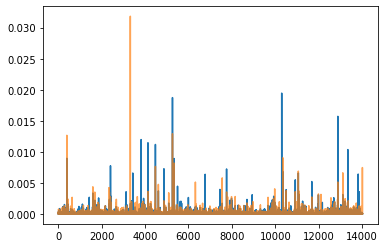

In [81]:
# word probabilities
sns.lineplot(x=list(corp1_prob.keys()),y=corp1_prob.values())
sns.lineplot(x=list(corp2_prob.keys()),y=corp2_prob.values(), alpha=.7);

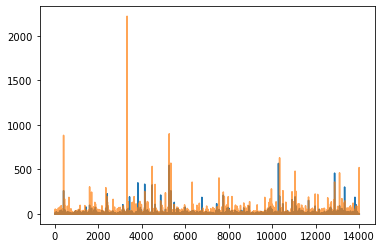

In [87]:
# word frequencies
sns.lineplot(x=list(dict_1.keys()),y=dict_1.values())
sns.lineplot(x=list(dict_2.keys()),y=dict_2.values(), alpha=.7);

# Checking out similarity scores

In [42]:
csvs = pd.read_csv('../data/dissimilar/games10000.csv')
csvs[10:20]

,satisfecho satisfecho,1,0.0,18957
10,A A,1,0.000000e+00,214729
11,clickclickclickclickclickclickclickclickclickc...,1,0.000000e+00,224545
12,Compralo Compralo,1,0.000000e+00,242056
13,fino encantado,1,0.000000e+00,253205
14,A A,1,0.000000e+00,256005
15,a a,1,0.000000e+00,311973
16,HOYLE NAAAAH,0,0.000000e+00,328496
17,a a,1,0.000000e+00,335989
18,KINOPIO KINOPIO,1,0.000000e+00,340999
19,Tr4sh Not Melee,0,6.305768e-07,43936


In [43]:
what = pd.read_csv('../data/interim/games_train.csv')


In [49]:
what[59010:59011]

,review,label
59010,a a,1


# Old Stuff

In [4]:
# 
corp_1 = []
for i in range(5): 
    row = X_1.iloc[i]['review']
    corp_1.append(row)
    
# 
corp_2 = []
for i in range(3): 
    row = X_2.iloc[i]['review']
    corp_2.append(row)
corp_2 = corp_2[1:]
corp_2

['Great sticking product Use this often.  Great sticking product.  Glad I purchased it.',
 "Very good, and the mask is good enough and perceivable ... Very good, and the mask is good enough and perceivable (it's pale green).  I wish the container had a stick attached to the cap, for convenience.  Generally I go get a couple of toothpicks to help me spread the goo around.  You could use an old brush that you have no further use for."]

In [21]:
count_vectorizer = TfidfVectorizer(stop_words='english')

TfidfVectorizer(stop_words='english')

In [23]:
sparse_matrix_1 = count_vectorizer.fit_transform(corp_1)

# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix_1 = sparse_matrix_1.todense()
df_1 = pd.DataFrame(doc_term_matrix_1, 
                  columns=count_vectorizer.get_feature_names_out())
df_1

,abe,acquainted,address,amazing,asleep,awesome,bc,big,boring,bought,...,unfortunately,unintelligible,uplifting,vinyl,visits,won,worked,world,worst,young
0,0.000000,0.000000,0.000000,0.000000,0.327465,0.000000,0.000000,0.000000,0.000000,0.132098,...,0.000000,0.000000,0.000000,0.000000,0.163733,0.000000,0.163733,0.000000,0.000000,0.000000
1,0.000000,0.188982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.188982,0.000000,...,0.188982,0.188982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.188982
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.183646,0.000000,0.183646,0.000000,0.183646,0.000000,0.000000,...,0.000000,0.000000,0.183646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.155691,0.000000,0.311382,0.000000,0.000000,0.000000,0.155691,0.000000,0.000000,0.125611,...,0.000000,0.000000,0.000000,0.155691,0.000000,0.155691,0.000000,0.155691,0.155691,0.000000


In [14]:
sparse_matrix_2 = count_vectorizer.fit_transform(corp_2)

# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix_2 = sparse_matrix_2.todense()
df_2 = pd.DataFrame(doc_term_matrix_2, 
                  columns=count_vectorizer.get_feature_names_out())
df_2

,12,12ml,24,artistic,aware,bit,bought,boxes,case,cedar,...,qty,ranges,run,set,single,small,stars,time,using,work
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000
1,0.116248,0.116248,0.116248,0.116248,0.116248,0.0,0.116248,0.116248,0.116248,0.116248,...,0.116248,0.116248,0.116248,0.697486,0.116248,0.232495,0.0,0.232495,0.116248,0.116248


In [16]:
# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df_1, df_2))

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 108 while Y.shape[1] == 34